# <center>Lab 7<br>Data Analytics - Step back - Into to Bayesian thinking </center>

<a id='zad1'></a>

***Probability distributions***

A probability distribution is a mathematical object that describes how likely different
events are. In general, these events are restricted somehow to a set of possible
events. A common and useful conceptualization in statistics is to think that data was
generated from some probability distribution with unobserved parameters. Since
the parameters are unobserved and we only have data, we will use Bayes' theorem
to invert the relationship, that is, to go from the data to the parameters. Probability
distributions are the building blocks of Bayesian models; by combining them in
proper ways we can get useful complex models.


***Gamma distribution*** 

Probably the most
famous of all of them is the Gaussian or normal distribution. A variable x follows a
Gaussian distribution if its values are dictated by the [following formula](https://en.wikipedia.org/wiki/Gamma_distribution).

In the formula, $\mu$ and $\sigma$ are the parameters of the distributions, where $\mu$ can take any real value, $\sigma$ is the standard deviation. Let's see what the Gaussian distribution family looks like.

*Exercise 1* Draw 9 plots of the [distribution](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.norm.html) for all combination of $\mu$ = [-1, 0, 1,] $\sigma$ = [0.5, 1, 1.5] and x = np.linspace(-a, a, 100) and a  your is equal your favorite number from 1 to 9.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
mean = [-1, 0, 1]
std = [0.5, 1, 1.5]
a = 7
x = np.linspace(-7, 7, 100)

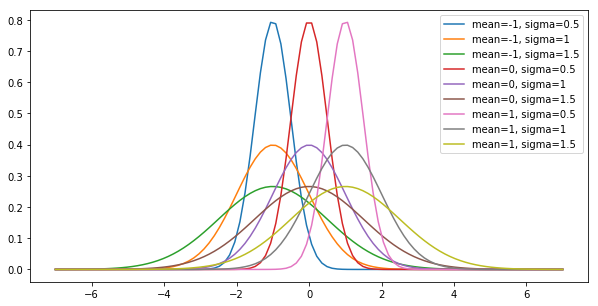

In [2]:
import itertools
plt.figure(figsize=(10,5))
legend = []
for mu, sigma in list(itertools.product(mean,std)):
    plt.plot(x, norm.pdf(x, mu, sigma))
    legend.append('mean={}, sigma={}'.format(mu, sigma))
plt.legend(legend)
plt.show()

Since Bayes' theorem is central and we will use it over and over again, let's learn the
names of its parts:
1. p(H): Prior
2. p(D|H): Likelihood
3. p(H|D): Posterior
4. p(D): Evidence

*The prior* distribution should reflect what we know about the value of some
parameter before seeing the data D. If we know nothing, we will use
flat priors that do not convey too much information. The use of priors is why some people still think
Bayesian statistics is subjective, even when priors are just another assumption that
we made when modeling and hence are just as subjective (or objective) as any other
assumption, such as likelihoods.

*The likelihood* is how we will introduce data in our analysis. It is an expression of
the plausibility of the data given the parameters.

*The posterior distribution* is the result of the Bayesian analysis and reflects all
that we know about a problem (given our data and model). The posterior is a
probability distribution for the parameters in our model and not a single value. This
distribution is a balance of the prior and the likelihood.  In fact, the posterior of one analysis can be used as the prior of
a new analysis after collecting new data. This makes Bayesian analysis particularly
suitable for analyzing data that becomes available in sequential order. 

***The coin-flipping problem***

The coin-flip problem is a classical problem in statistics and goes like this. We toss a
coin a number of times and record how many heads and tails we get. Based on this
data we try to answer questions such as is the coin fair? Or, more generally, how
biased is the coin? While this problem may sound dull, we should not underestimate
it. The coin-flipping problem is a great example to learn the basic of Bayesian
statistics; on the one hand, it is about tossing coins, something familiar to almost
anyone; on the other, it is a simple model that we can solve and compute with ease.
Besides, many real problems consist of binary mutually exclusive outcomes such
as 0 or 1, positive or negative, odds or evens, spam or ham, safe or unsafe, healthy
or unhealthy, and so on. Thus, even when we are talking about coins, this model
applies to any of those problems.

**The general model**

The first thing we will do is generalize the concept of bias. We will say that a coin
with a bias of 1 will always land heads, one with a bias of 0 will always land tails,
and one with a bias of 0.5 will land half of the time heads and half of the time tails.
To represent the bias, we will use the parameter $\theta$ , and to represent the total number
of heads for an N number of tosses, we will use the variable y. According to Bayes'
theorem we have the following formula:

$$p (\theta | y) \tilde p ( y |\theta) p (\theta )$$

Notice that we need to specify which prior p($\theta$ ) and likelihood p( y |$\theta$ ) we will use.


**Choosing the likelihood**

Let's assume that a coin toss does not affect other tosses, that is, we are assuming
coin tosses are independent of each other. Let's also assume that only two outcomes
are possible, heads or tails.  Given these assumptions, a good candidate for the
likelihood is the [binomial distribution](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html).

This is a discrete distribution returning the probability of getting y heads (or in
general, success) out of N coin tosses (or in general, trials or experiments) given a
fixed value of $\theta$ .


*Exercise 2*
Generate the code of 9 binomial distributions; each subplot should indicating the corresponding parameters:
n_params = [1, 2, 4]
p_params = [0.25, 0.5, 0.75]

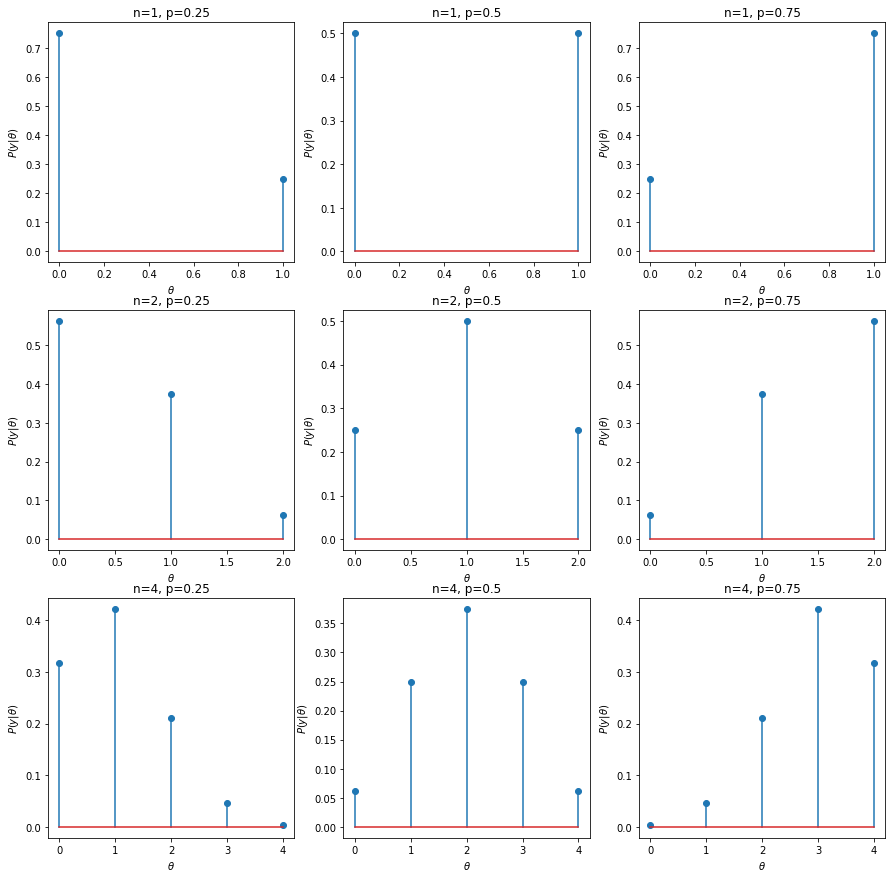

In [3]:
n_params = [1,2,4]
p_params = [0.25, 0.5, 0.75]
from scipy.stats import binom
plt.figure(figsize=(15,15))
for i, (n, p) in enumerate(list(itertools.product(n_params,p_params))):
    plt.subplot(3,3,i+1)
    x = np.arange(0,n+1)
    plt.stem(x, binom.pmf(x, n, p))
    plt.title('n={}, p={}'.format(n,p))
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$P(y | \theta)$')
plt.show()

In [ ]:
plt.stem(x, binom.pmf(x, n, p))

**Choosing the prior**

As a prior we will use a [beta distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html), which is a very common distribution in
Bayesian statistics.

If we look carefully we will see that the beta distribution looks similar to the
binomial except for the term with the $\Gamma$, which represents what is known as gamma function. The beta distribution has two parameters,  $\alpha$ and $\beta$, that control the distribution.

*Exercise 3* Explore the beta distribution. Generate the cod od 16 beta distributions, for all combination of $\alpha, \beta \in$ params = [0.5, 1, 2, 3] and x = np.linspace(0, 1, 100).

[       inf 3.18326126 2.26247848 1.8569024  1.61656631 1.45357148
 1.33403807 1.2417735  1.16793758 1.10724267 1.05630739 1.01285586
 0.97529292 0.94246324 0.91350692 0.88776915 0.86474147 0.84402233
 0.82528996 0.80828315 0.79278747 0.77862505 0.76564706 0.75372793
 0.74276096 0.7326549  0.72333123 0.71472207 0.70676841 0.6994188
 0.69262817 0.68635692 0.6805702  0.67523724 0.67033082 0.66582686
 0.66170406 0.65794352 0.65452857 0.65144446 0.64867823 0.64621851
 0.64405543 0.64218045 0.64058629 0.63926685 0.63821715 0.63743326
 0.63691227 0.63665225 0.63665225 0.63691227 0.63743326 0.63821715
 0.63926685 0.64058629 0.64218045 0.64405543 0.64621851 0.64867823
 0.65144446 0.65452857 0.65794352 0.66170406 0.66582686 0.67033082
 0.67523724 0.6805702  0.68635692 0.69262817 0.6994188  0.70676841
 0.71472207 0.72333123 0.7326549  0.74276096 0.75372793 0.76564706
 0.77862505 0.79278747 0.80828315 0.82528996 0.84402233 0.86474147
 0.88776915 0.91350692 0.94246324 0.97529292 1.01285586 1.05630

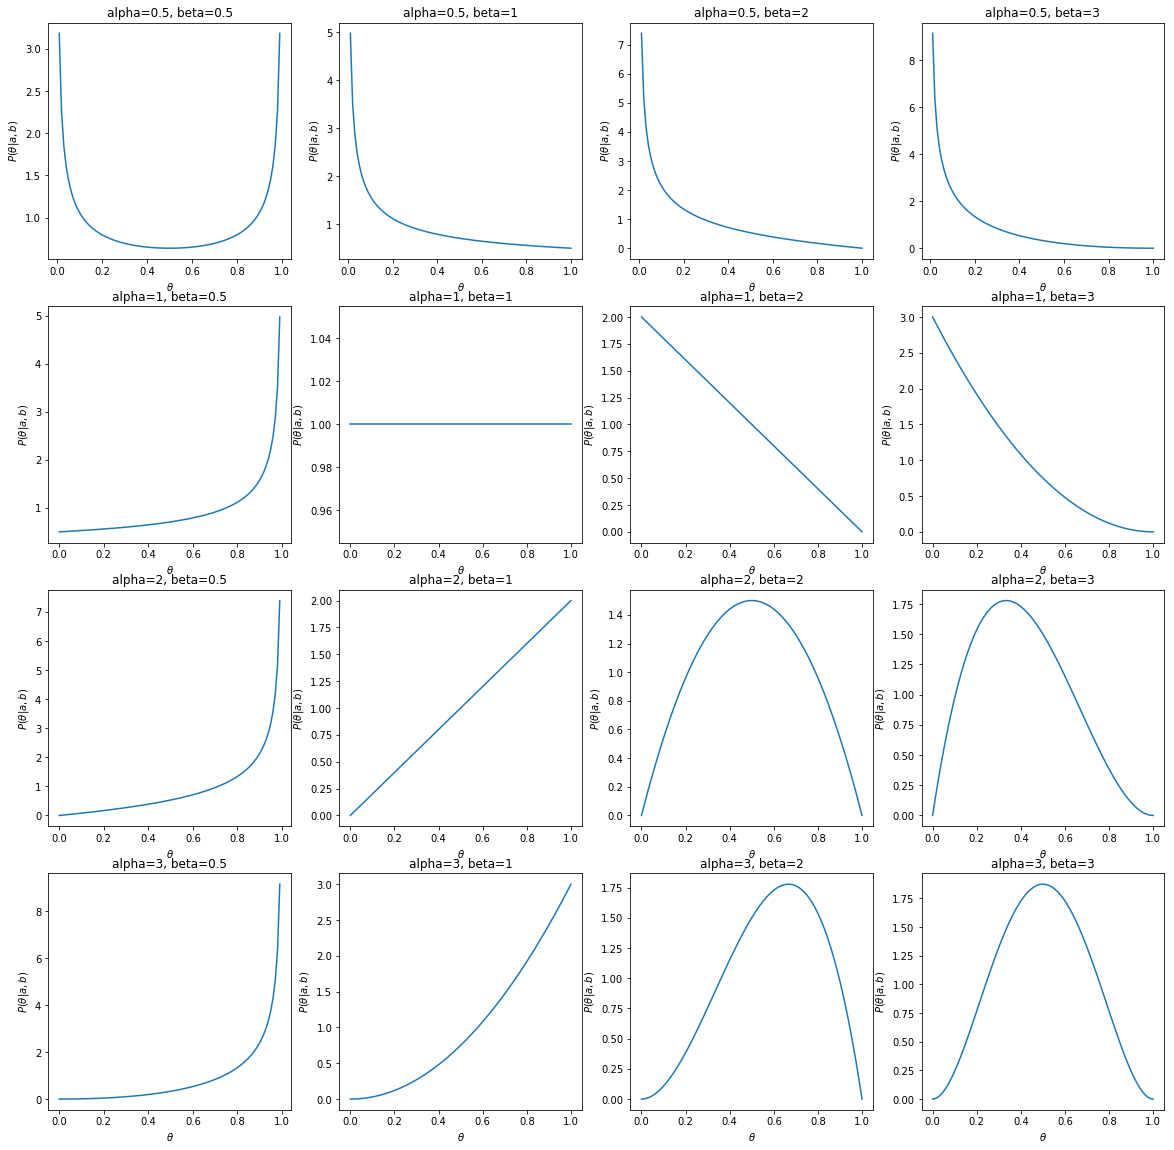

In [4]:
from scipy.stats import beta
params = [0.5, 1, 2, 3]
x = np.linspace(0,1,100)
plt.figure(figsize=(20,20))
legend = []
for i, (a, b) in enumerate(list(itertools.product(params,params))):
    plt.subplot(4,4,i+1)
    plt.plot(x, beta.pdf(x, a, b))
    if i == 0:
        print(beta.pdf(x, a, b))
    plt.title('alpha={}, beta={}'.format(a, b))
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$P(\theta | a,b)$')
plt.show()

But why are we using the beta distribution for our model? The reason is that the
beta distribution is the conjugate prior of the binomial distribution (which we are
using as the likelihood). A conjugate prior of a likelihood is a prior that, when used in
combination with the given likelihood, returns a posterior with the same functional
form as the prior. Untwisting the tongue, every time we use a beta distribution as
prior and a binomial distribution as likelihood, we will get a beta as a posterior.
There are other pairs of conjugate priors, for example, the Gaussian distribution is the
conjugate prior of itself. [Read!](https://en.wikipedia.org/wiki/Conjugate_prior). And then you would know, that If we then sample this random variable and get s successes and f failures, we have another Beta distribution with parameters $(\alpha + s, \beta + f)$. 



*Computing and plotting the posterior*

*Exercise 4* Compute and plot the results. Use:

theta_real = 0.35

trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]

data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]

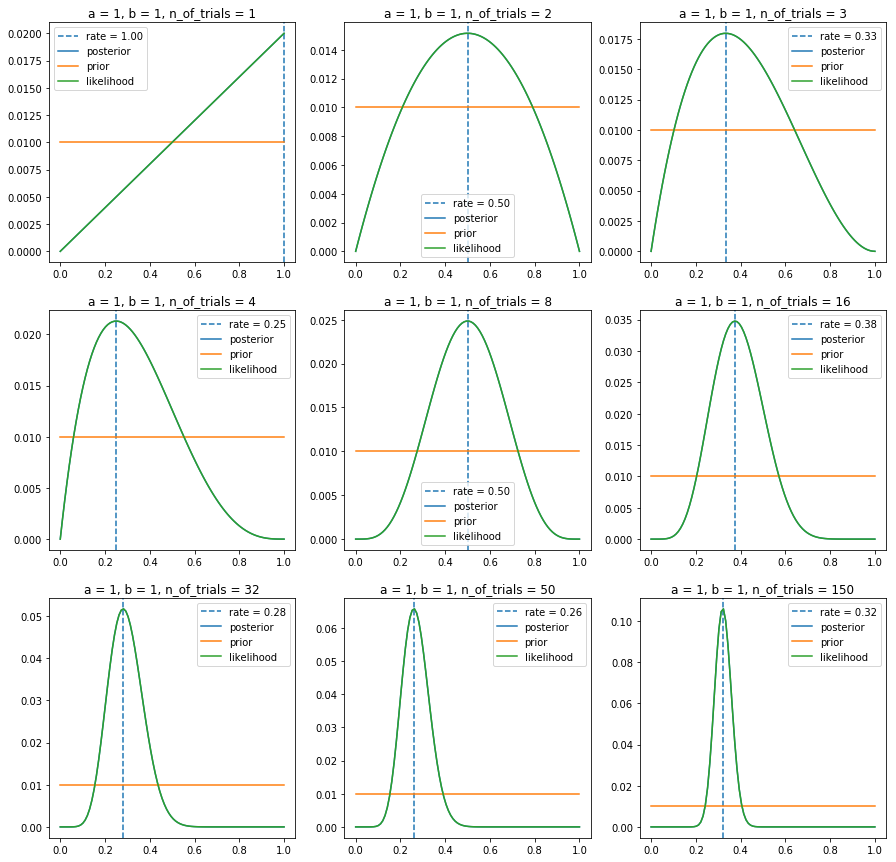

/home/kacper/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/kacper/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


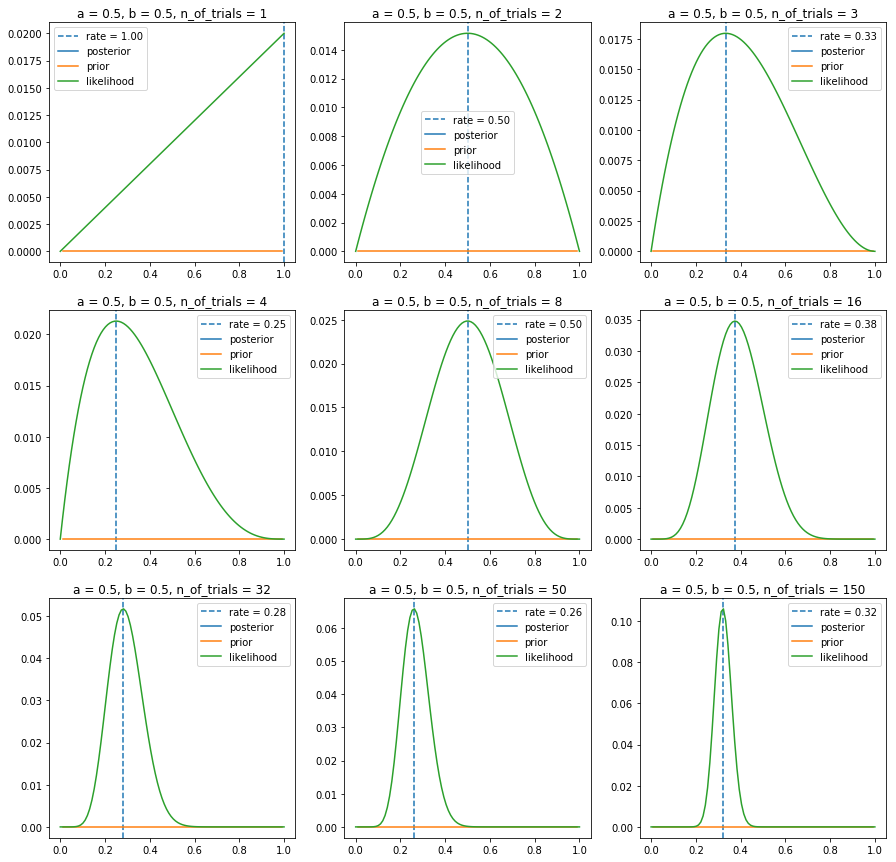

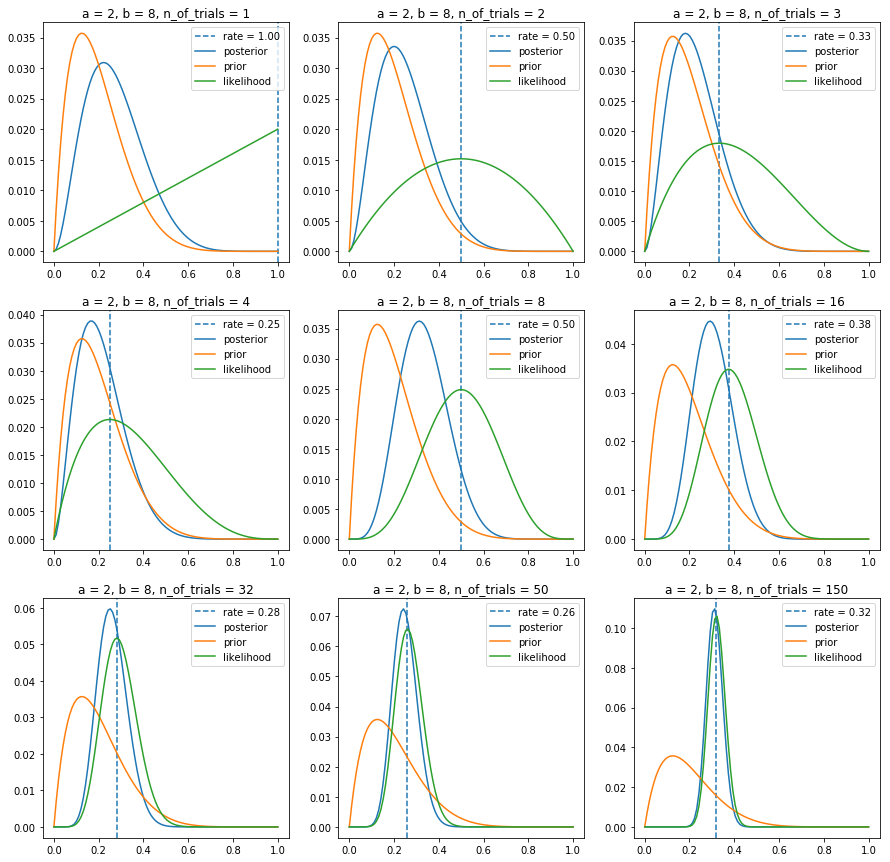

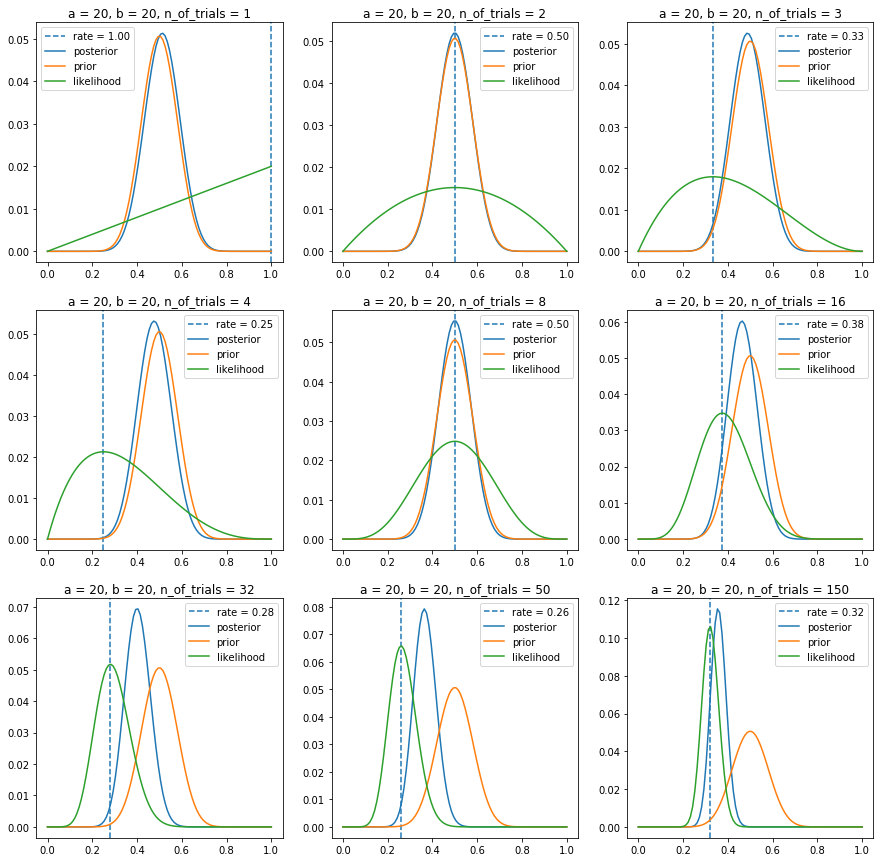

In [6]:
theta_real = 0.35
trials = [1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [1, 1, 1, 1, 4, 6, 9, 13, 48]
beta_params = [(1, 1), (0.5, 0.5), (2, 8), (20, 20)]
theta = np.linspace(0,1,100)
for a, b in beta_params:
    plt.figure(figsize=(15,15))
    for i, (n_trials, n_sucess) in enumerate(zip(trials, data)):
        plt.subplot(3, 3, i+1)
        theta = np.linspace(0,1, 100)
        prior = beta.pdf(theta, a, b)
        likelihood = binom.pmf(n_sucess, n_trials, theta)
        posterior = prior * likelihood
#         theta_prior = np.linspace(0,1,n_trials+1)
#         theta = np.arange(0,n_trials+1)
#         prior = beta.pdf(theta_prior, a, b)
        prob = n_sucess/n_trials
#         likelihood = binom.pmf(theta, n_trials, prob)
#         posterior = prior * likelihood
        plt.axvline(x=prob, linestyle='--')
        plt.plot(theta, posterior/sum(posterior), '-')
        plt.plot(theta, prior/sum(prior), '-')
        plt.plot(theta, likelihood/sum(likelihood), '-')
        
        plt.plot()
        plt.legend(['rate = {:.2f}'.format(prob),'posterior', 'prior', 'likelihood'])
        plt.title('a = {}, b = {}, n_of_trials = {}'.format(a,b,n_trials))
    plt.show()
        

0.35333333333333333


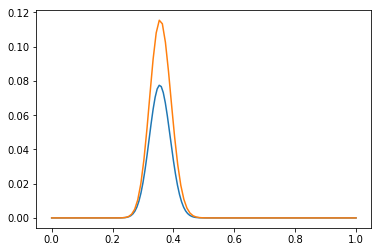

In [13]:
# calculating theta real for last prior 
print(np.argmax(posterior)/150)
theta = np.linspace(0,1,100)
# compare last distributions
post = beta.pdf(theta, a+n_sucess, b+n_trials-n_sucess)
plt.figure()
plt.plot(theta_prior, posterior/sum(posterior), '-')
plt.plot(theta, post/sum(post))
plt.show()

Instead of calculating the product the prior and likelihood I could use the conjugate ability to calculate posterior directly:
dist.pdf(x, a_prior + y, b_prior + N - y)

**Summarizing the posterior**

The result of a Bayesian analysis is the posterior distribution. This contains all the
information about our parameters according to the data and the model. If possible,
we can just show the posterior distribution to our audience. In general, it is also a
good idea to report the mean (or mode or median) of the distribution to have an idea
of the location of the distribution and some measure, such as the standard deviation,
to have an idea of the dispersion and hence the uncertainty in our estimate. The
standard deviation works well for normal-like distributions but can be misleading
for other types of distributions, such as skewed ones. So intead, we could use the
following approach.

*Highest posterior density*

A commonly used device to summarize the spread of a posterior distribution is to
use a Highest Posterior Density (HPD) interval. An HPD is the shortest interval
containing a given portion of the probability density. One of the most commonly
used is the 95% HPD or 98% HPD, often accompanied by the 50% HPD. If we say
that the 95% HPD for some analysis is [2-5], we mean that according to our data and
model we think the parameter in question is between 2 and 5 with a 0.95 probability.
This is a very intuitive interpretation, to the point that often people misinterpret
frequentist confidence intervals as if they were Bayesian credible intervals. There is nothing special about choosing
95% or 50% or any other value. They are just arbitrary commonly used values; we
are free to choose the 91.37% HPD interval if we like. If you want to use the 95%
value, it's OK; just remember that this is just a default value and any justification of
which value we should use will be always context-dependent and not automatic.

**Exercises 5:**
    
a. Modify your code that generated figure in exercise 4 in order to add a dotted vertical line showing the observed rate head/(number of tosses), compare the location of this line to the mode of the posteriors in each subplot.

b. Try reploting figure in exercise 4 using other priors (beta_params) and other data (trials and data).

c. Read about [Cromwell's rule at Wikipedia](https://en.wikipedia.org/wiki/Cromwell%27s_rule).

d. Explore different parameters for the Gaussian, binomial and beta plots.

e. Read about probabilities and the [Dutch book at Wikipedia](https://en.wikipedia.org/wiki/Dutch_book).

f. Read https://github.com/fonnesbeck/scipy2014_tutorial/blob/master/1_Introduction-to-Bayes.ipynb

g. If you still have a problem with understanding, watch the video for the very beginners https://www.youtube.com/watch?v=0F0QoMCSKJ4.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)

References:
1. Andrew Gelman at al. "Bayesian Data Analysis"
2. Osvaldo Martin: "Bayesian Analysis with Python - Second Edition"